In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-dataset/Twitter_Data.csv


In [2]:
pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/kaggle/input/twitter-sentiment-dataset/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.drop('category',axis=1,inplace=True)

In [6]:
df.head()

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [7]:
df=df.head(1000)
df.shape

(1000, 1)

In [8]:
df.isna().sum()

clean_text    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  999 non-null    object
dtypes: object(1)
memory usage: 15.6+ KB


# clean the data

In [11]:
def cleantext(text):
    # removing @ mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    # removing '#' symbol
    text=re.sub(r'#','',text)
    # removing retweets (RT)
    text=re.sub(r'RT[\s]+','',text)
    # removing the hyper link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text

In [12]:
df['clean_text']=df['clean_text'].apply(cleantext)
df

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
995,another meltdown india which will further rejo...
996,there are two reasons for atmosphere hatred cr...
997,modi has wiped out the small micro industries ...
998,bjp struggles find candidates west bengal graf...


# get the subjectivity and polarity

In [13]:
# get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# get the polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
# create new columns 
df['subjectivity']=df['clean_text'].apply(getsubjectivity)
df['polarity']=df['clean_text'].apply(getpolarity)
df

,clean_text,subjectivity,polarity
0,when modi promised “minimum government maximum...,0.700000,-0.300000
1,talk all the nonsense and continue all the dra...,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000
4,answer who among these the most powerful world...,0.750000,0.400000
...,...,...,...
995,another meltdown india which will further rejo...,0.513889,0.069444
996,there are two reasons for atmosphere hatred cr...,0.000000,0.000000
997,modi has wiped out the small micro industries ...,0.400000,-0.250000
998,bjp struggles find candidates west bengal graf...,0.166667,-0.133333


# plotting the wordcloud

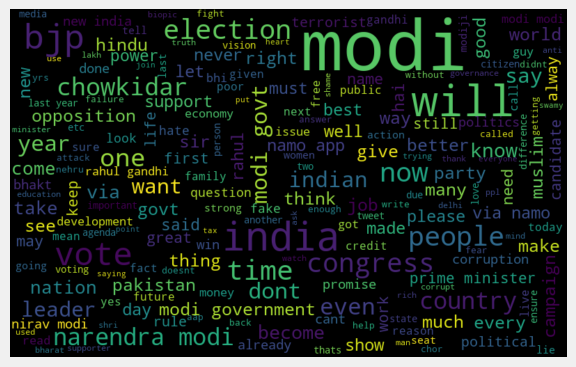

In [14]:
allwords=' '.join(twts for twts in df['clean_text'])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# computing the negative,neuutral,positive analysis

In [15]:
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
df['analysis']=df['polarity'].apply(getanalysis)
df

,clean_text,subjectivity,polarity,analysis
0,when modi promised “minimum government maximum...,0.700000,-0.300000,negative
1,talk all the nonsense and continue all the dra...,0.000000,0.000000,neutral
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333,positive
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000,positive
4,answer who among these the most powerful world...,0.750000,0.400000,positive
...,...,...,...,...
995,another meltdown india which will further rejo...,0.513889,0.069444,positive
996,there are two reasons for atmosphere hatred cr...,0.000000,0.000000,neutral
997,modi has wiped out the small micro industries ...,0.400000,-0.250000,negative
998,bjp struggles find candidates west bengal graf...,0.166667,-0.133333,negative


# wordcloud for positive words

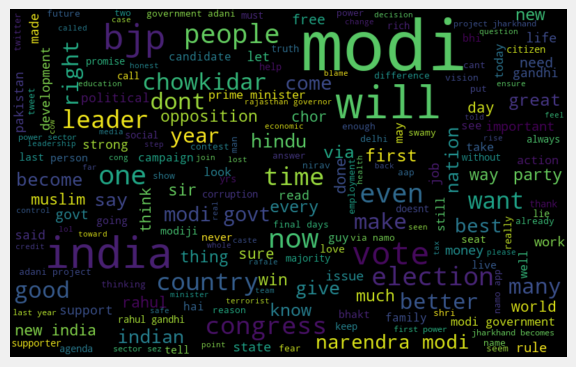

In [16]:
poswords=' '.join([twts for twts in df['clean_text'][df['analysis']=='positive']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(poswords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# wordcloud for negative words

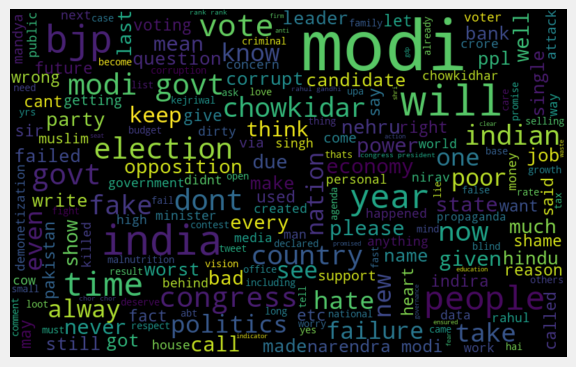

In [17]:
negwords=' '.join([twts for twts in df['clean_text'][df['analysis']=='negative']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(negwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# plotting the polarity and subjectivity

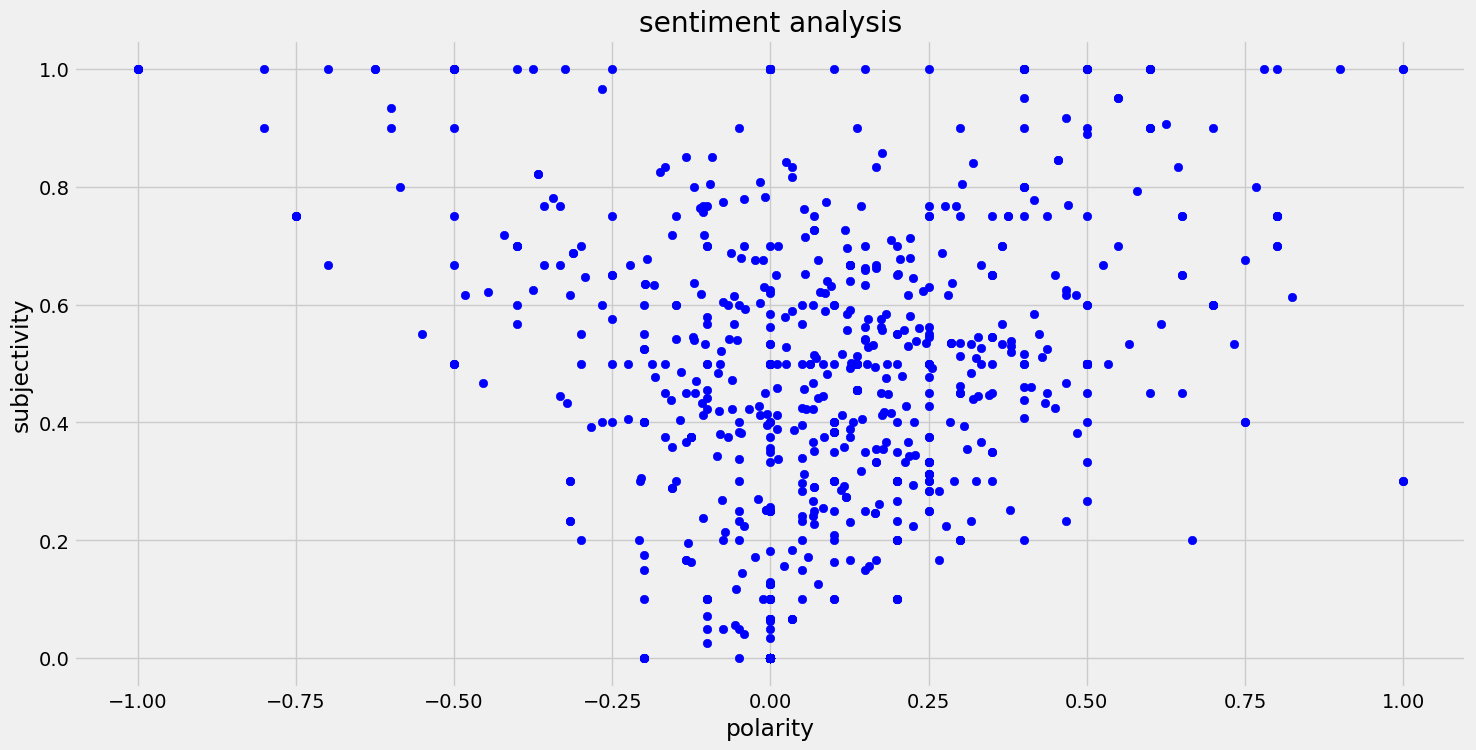

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(df['polarity'],df['subjectivity'],color='blue')    
plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

# get the percentage for positive and negative tweets

In [19]:
pos_tweets=df[df.analysis=='positive']
pos_tweets=pos_tweets['clean_text']
pos_tweets.head()

2    what did just say vote for modi  welcome bjp t...
3    asking his supporters prefix chowkidar their n...
4    answer who among these the most powerful world...
8    with upcoming election india saga going import...
9                           gandhi was gay does modi  
Name: clean_text, dtype: object

In [20]:
round((pos_tweets.shape[0]/df.shape[0])*100,1)

44.1

In [21]:
neg_tweets=df[df.analysis=='negative']
neg_tweets=neg_tweets['clean_text']
neg_tweets.head()

0     when modi promised “minimum government maximum...
15    vote such party and leadershipwho can take fas...
19    didn’ write chowkidar does mean ’ anti modi tr...
21    with firm belief the leadership shri narendra ...
23    sultanpur uttar pradesh loksabha candidate sel...
Name: clean_text, dtype: object

In [22]:
round((neg_tweets.shape[0]/df.shape[0])*100,1)

22.5

# plotting the polarity

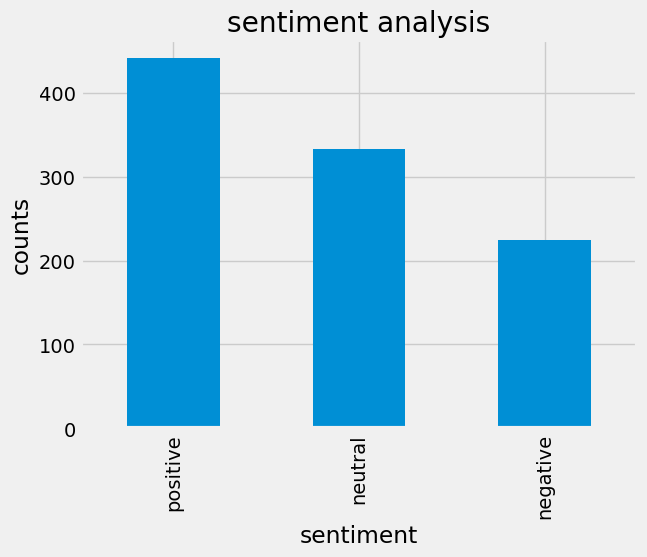

In [23]:
df['analysis'].value_counts()
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['analysis'].value_counts().plot(kind='bar')
plt.show()